# Special thanks to 
https://www.chinahadoop.cn/course/1327

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BATCH_SIZE = 500 
NOISE_DIM = 5

In [3]:
def get_gaussian_dist(mu, sigma): # the real data
    temp = np.random.normal(mu, sigma, size=BATCH_SIZE)[:, np.newaxis]
    return torch.from_numpy(temp).float()

In [4]:
def extract(v):
    return v.detach().storage().tolist()
def stats(d):
    return [np.mean(d), np.std(d)]

In [5]:
# Generator 
G = nn.Sequential(                      
    nn.Linear(NOISE_DIM, 128),            
    nn.ReLU(),
    nn.Linear(128, 1),                  
)

# Discriminator 
D = nn.Sequential(                      # Discriminator 
    nn.Linear(1, 128),     
    nn.ReLU(),
    nn.Linear(128, 1),     
    nn.Sigmoid(),
)

In [6]:
opt_D = torch.optim.Adam(D.parameters(), lr=0.0001)
opt_G = torch.optim.Adam(G.parameters(), lr=0.0001)

In [7]:
noise = torch.randn(BATCH_SIZE, NOISE_DIM)

In [8]:
for step in range(10000):
    # train discrimintor
    d_real_data = get_gaussian_dist(5, 2)    # real data
    noise = torch.randn(BATCH_SIZE, NOISE_DIM)  # random noise
    d_fake_data = G(noise)                      # fake data from G (generated from random ideas)

    prob_real_decision = D(d_real_data)          # D try to increase this prob
    prob_fake_decision = D(d_fake_data.detach()) # D try to reduce this prob
    
    D_loss = - torch.mean(torch.log(prob_real_decision) + torch.log(1. - prob_fake_decision))
    opt_D.zero_grad()
    D_loss.backward()
    opt_D.step()

    # train generator 
    noise = torch.randn(BATCH_SIZE, NOISE_DIM)  # random noise
    g_fake_data = G(noise)                      # fake data from G (generated from random ideas)
    prob_fake_decision = D(g_fake_data)         # G try to increase this prob
    
    G_loss = torch.mean(torch.log(1. - prob_fake_decision))
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()

    if step % 500 == 0:  # plotting
        print("Epoch %s: ; Real Dist (%s),  Fake Dist (%s) " %
                  (step, stats(extract(d_real_data)), stats(extract(g_fake_data))))

Epoch 0: ; Real Dist ([4.99791728669405, 2.0298276505007187]),  Fake Dist ([-0.04748060984537005, 0.1993357999114303]) 
Epoch 500: ; Real Dist ([4.9414460913240905, 1.9852812478927666]),  Fake Dist ([2.4878758471012117, 0.6580769601824392]) 
Epoch 1000: ; Real Dist ([5.190653932675719, 1.9569518943218187]),  Fake Dist ([5.072013554096222, 1.3940788671843882]) 
Epoch 1500: ; Real Dist ([4.827570859968662, 2.0596180370910147]),  Fake Dist ([6.4176603021621705, 1.7461353171209528]) 
Epoch 2000: ; Real Dist ([4.878758182227611, 1.9036919241961743]),  Fake Dist ([5.304669719219207, 1.3352467785422577]) 
Epoch 2500: ; Real Dist ([5.020141328699887, 2.0798808767888306]),  Fake Dist ([4.844281733989716, 1.340239254135111]) 
Epoch 3000: ; Real Dist ([4.96957964758575, 1.9854813007992391]),  Fake Dist ([5.4180725498199465, 1.64638291650291]) 
Epoch 3500: ; Real Dist ([5.1491693662852045, 1.961373186130574]),  Fake Dist ([5.077029882907867, 1.9859275839906505]) 
Epoch 4000: ; Real Dist ([4.984888

Plotting the generated distribution...


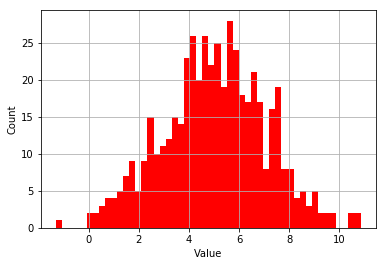

In [9]:
print("Plotting the generated distribution...")
values = extract(g_fake_data)
plt.hist(values, bins=50,color="red")
plt.xlabel('Value')
plt.ylabel('Count')
#plt.title('Histogram of Generated Distribution')
plt.grid(True)
plt.show()

Plotting the generated distribution...


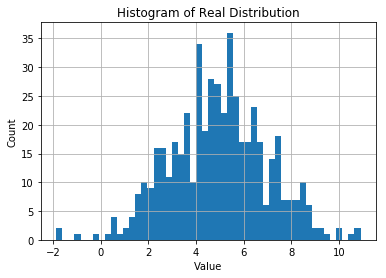

In [10]:
print("Plotting the generated distribution...")
values = extract(d_real_data)
plt.hist(values, bins=50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of Real Distribution')
plt.grid(True)
plt.show()